In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from scipy.stats import poisson, uniform, expon, pareto
from scipy.optimize import minimize
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

In [2]:
def calcPrize(n, p):
    return n*p / (1-(1-p)**n)

In [4]:
ps = np.arange(0.001, 1, 0.001)
xs = np.array([calcPrize(2, p) for p in ps])

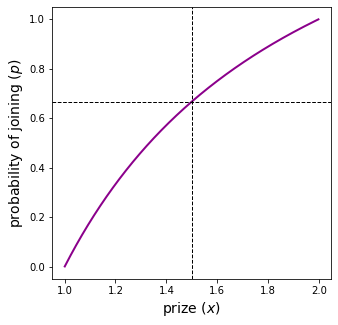

In [24]:
f, ax = plt.subplots(figsize=(5,5))

ax.plot(xs,ps, linewidth=2, color='darkmagenta')
ax.set_xlabel(r'prize ($x$)', size=14)
ax.set_ylabel(r'probability of joining ($p$)', size=14)

ax.axvline(1.5, linewidth=1, color='k', linestyle='--')
ax.axhline(2/3, linewidth=1, color='k', linestyle='--')

plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

In [26]:
ps = np.arange(0.001, 1, 0.001)
ns = [2,3,4,5]

xs = []
for n in ns:
    temp = [calcPrize(n, p) for p in ps]
    xs.append(temp)
xs = np.array(xs)
xs.shape

(4, 999)

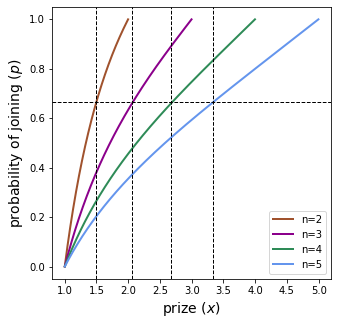

In [43]:
f, ax = plt.subplots(figsize=(5,5))

colors = ['sienna', 'darkmagenta', 'seagreen', 'cornflowerblue']
for i, n in enumerate(ns):
    ax.plot(xs[i], ps, linewidth=2, color=colors[i], label='n={}'.format(n))

ax.set_xlabel(r'prize ($x$)', size=14)
ax.set_ylabel(r'probability of joining ($p$)', size=14)


ax.axhline(2/3, linewidth=1, color='k', linestyle='--')
ax.axvline(1.5, linewidth=1, color='k', linestyle='--')
ax.axvline(2.06, linewidth=1, color='k', linestyle='--')
ax.axvline(2.67, linewidth=1, color='k', linestyle='--')
ax.axvline(3.33, linewidth=1, color='k', linestyle='--')

ax.legend()
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

In [55]:
ns = np.arange(2, 50)
ns

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [56]:
prizeForOne = np.array([calcPrize(n, 1/n) for n in ns])

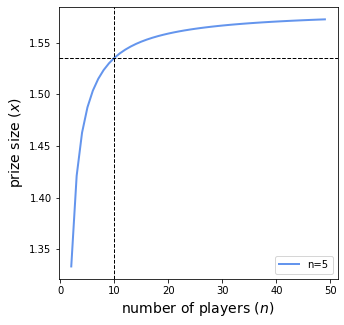

In [67]:
f, ax = plt.subplots(figsize=(5,5))

ax.plot(ns, prizeForOne, linewidth=2, color='cornflowerblue', label='n={}'.format(n))

ax.set_xlabel(r'number of players ($n$)', size=14)
ax.set_ylabel(r'prize size ($x$)', size=14)


ax.axhline(1.535, linewidth=1, color='k', linestyle='--')
ax.axvline(10, linewidth=1, color='k', linestyle='--')

ax.legend()
plt.savefig('out.png', facecolor='white', dpi=200, bbox_inches='tight')
plt.show()

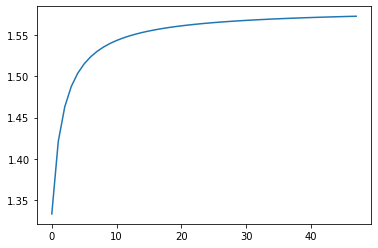

In [57]:
plt.plot(prizeForOne)